<div align="center">
  <h1>Using SciKit Learn (Addendum)</h1>
</div>

In [90]:
#imports used in all examples
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Example 1

### Preparing Data

In [91]:
_window_size = 5 #define window size
forecast = 10 #define forecast
data = list(range(120)) #data used as input .... from 0 to 119

In [92]:
#data

In [93]:
window_data = data[:-forecast]

In [94]:
#len(window_data) #data size - forecast

In [95]:
windows = []
for i in range(len(window_data) - _window_size + 1):
    windows.append(data[i: i+_window_size])
#simplified / list comprehensions
#windows = [data[i: i+_window_size] for i in range(len(window_data) - _window_size + 1)] #matrix

In [96]:
#windows

In [97]:
fc = list(range(len(window_data) - _window_size + 1))
for i in range(len(window_data) - _window_size + 1):
    fc[i] = data[i+_window_size+forecast-1]

#simplified / list comprehensions
#fc = [data[i+_window_size+forecast-1] for i in range(len(window_data) - _window_size + 1)] #vector

In [98]:
#fc

In [99]:
df = pd.DataFrame.from_dict({"X": windows, "y": fc}) #Using pandas for simplicity purpose (no need to go into detail)

In [100]:
#df

In [101]:
train = df[:80] #split data into train and
test = df[80:] # test data

In [102]:
#test

### Prediction 

In [103]:
regressor = LinearRegression(normalize=True)
regressor.fit(list(train['X']), list(train['y']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [104]:
predict = regressor.predict(list(test['X']))

In [105]:
test['prediction'] = predict #ignore warning

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [106]:
#test

In [107]:
%matplotlib inline

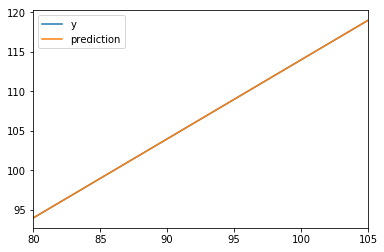

In [108]:
test[['y', 'prediction']].plot() #input data is very simple and prdiction is very accurate (100%)

## Example 2 (extended version of Example 1)

### Preparing Data

In [109]:
window_size = 250
forecast = 10
data = list(range(10000))
data = list(np.sin([x for x in np.linspace(0,30,10000)])) #input data as sinus
data = [(np.random.normal(0.5)) + x for x in data] #adding some random, gausian noise. Comment out to see prediction without noise
window_data = data[:-forecast]
split = int(len(data) * 0.8)
windows = [data[i: i+window_size] for i in range(len(window_data) - window_size + 1)]
fc = [data[i+window_size+forecast-1] for i in range(len(window_data) - window_size + 1)]
df = pd.DataFrame.from_dict({"X": windows, "y": fc})
#df

In [110]:
train = df[:split]
test = df[split:]
#test

### Prediction

In [111]:
regressor = LinearRegression(normalize=True)
regressor.fit(list(train['X']), list(train['y']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [112]:
predict = regressor.predict(list(test['X']))

In [113]:
test['prediction'] = predict #ignore warning

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
#test

In [115]:
%matplotlib inline

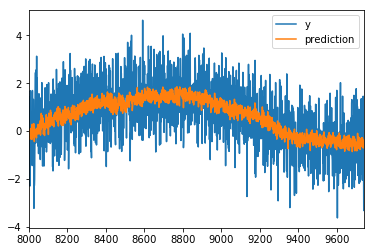

In [116]:
test[['y', 'prediction']].plot() #if noise commented out, blue line is identical as prediction

## Student Example

In [117]:
csvDataFrame = pd.read_csv('YHOO.csv')
value = csvDataFrame['VALUE'].tolist()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


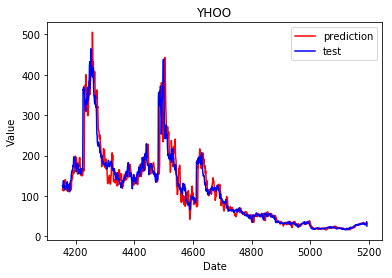

In [118]:
_window_size = 100
forecast = 5

window_data = value[:-forecast]
windows = [value[i: i+_window_size] for i in range(len(window_data) - _window_size + 1)] 
fc = [value[i+_window_size+forecast-1] for i in range(len(window_data) - _window_size + 1)] 

df = pd.DataFrame.from_dict({"X": windows, "y": fc})
split = int(len(df) * 0.8)
train = df[:split]
test = df[split:]
regressor = LinearRegression(normalize=True)
regressor.fit(list(train['X']), list(train['y']))
predict = regressor.predict(list(test['X']))
test['prediction'] = predict
plt.plot(test['prediction'], '-r', label='prediction')
plt.plot(test['y'], '-b', label='test')
plt.title('YHOO')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()